In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
os.chdir('./Archive (1)')

### prob 1
The zip file contains 9 files. For the mock data 1 to mock data 6, plot
their histograms (play with bin sizes and find an appropriate bin-size)
and try to have a guess from what distribution these data are drawn.

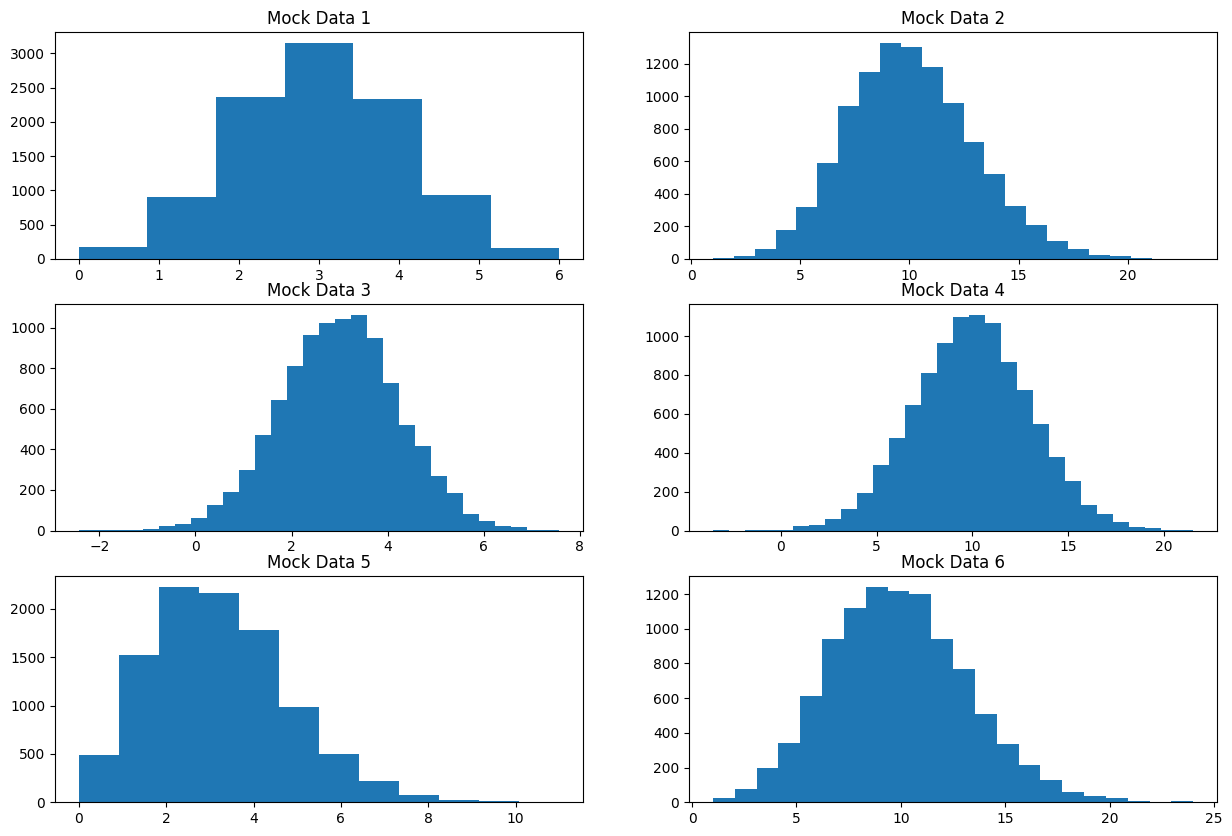

In [27]:
filename = 'mock_data_'
fig, ax = plt.subplots(3,2, figsize=(15,10))
for i in range(1, 7):
    data = np.loadtxt(f'{filename}{i}.txt')
    binsize=[7,23,30,30,12,22]
    ax[(i-1)//2, (i-1)%2].hist(data, bins=binsize[i-1])
    ax[(i-1)//2, (i-1)%2].set_title(f'Mock Data {i}')